<a href="https://colab.research.google.com/github/KonstToIT/Lifespan_prediction/blob/main/lifespan_prediction_actual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цели исследования

Проверить, можно ли методами машинного обучения предсказать продолжительность жизни по астрологическим показателям человека и его полу.





# Импортируем необходимые компоненты

In [ ]:
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import math as m

Загружаем наш csv файл

In [ ]:
file=files.upload()

Saving astrology_dataset_ver1.12.csv to astrology_dataset_ver1.12.csv


Считываем нашу базу данных из файла

In [ ]:
Database=pd.read_csv("astrology_dataset_ver1.12.csv")

#Начинаем преобразование наших данных

Удаляем записи с пропусками

In [ ]:
Database=Database.dropna()

Преобразуем содержание ячеек столбцов в целое число

In [ ]:
columns=["плутон","нептун","уран","сатурн","юпитер"]
for i in columns:
  Database[i] = Database[i].apply(lambda x:list(map(int,x.split("."))))
  Database[i] = Database[i].apply(lambda x:x[0]+x[1]/60+(x[2]-1)*30) #???

In [ ]:
Database["пол"]=Database["пол"].apply(lambda x:1 if x=="M" else 0) # Если Пол Мужской, ставим 1, если женский, 0


## Смотрим на описание наших данных(стандартное отклонение, среднее значение, максимальное значение)

In [ ]:
Database.describe()

Строим гистограмму частот значений колонки "годы в днях"

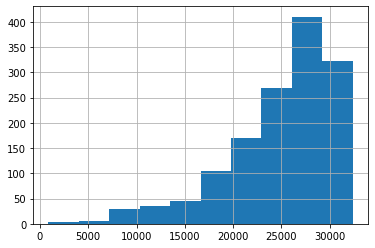

In [ ]:
Database["годы в днях"].hist()

## Разбиваем наши данные на тренировочный и тестировочный наборы

In [ ]:
train, test=np.split(Database.sample(frac=1), [int(.8*len(Database))])

In [ ]:
X_train=train.drop(["годы в днях"], axis="columns")

In [ ]:
Y_train=train["годы в днях"]

## Отбираем важные признаки(не работает)

In [ ]:
fs=FeatureSelector(data=X_train, labels=Y_train)

NameError: ignored

In [ ]:
fs.identify_collinear(correlation_threshold=0.98)

0 features with a correlation magnitude greater than 0.98.



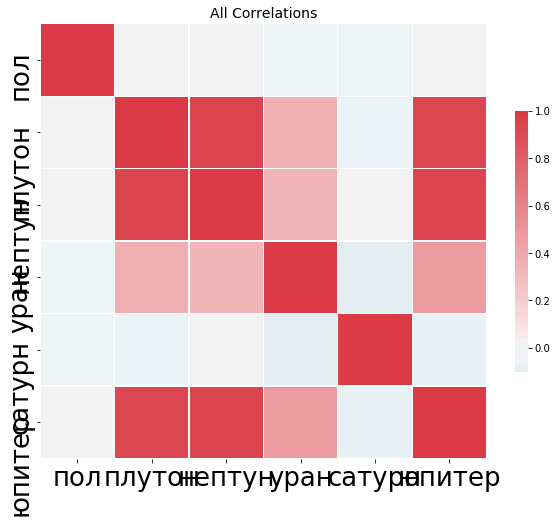

In [ ]:
fs.plot_collinear(True)

In [ ]:
fs.identify_zero_importance(task="regression",eval_metric="mae",n_iterations=10, early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[26]	valid_0's l1: 4168.58
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l1: 3911.5
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's l1: 4068.7
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l1: 4015.26
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l1: 4572.7
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's l1: 4708.73
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l1: 3802.56
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5

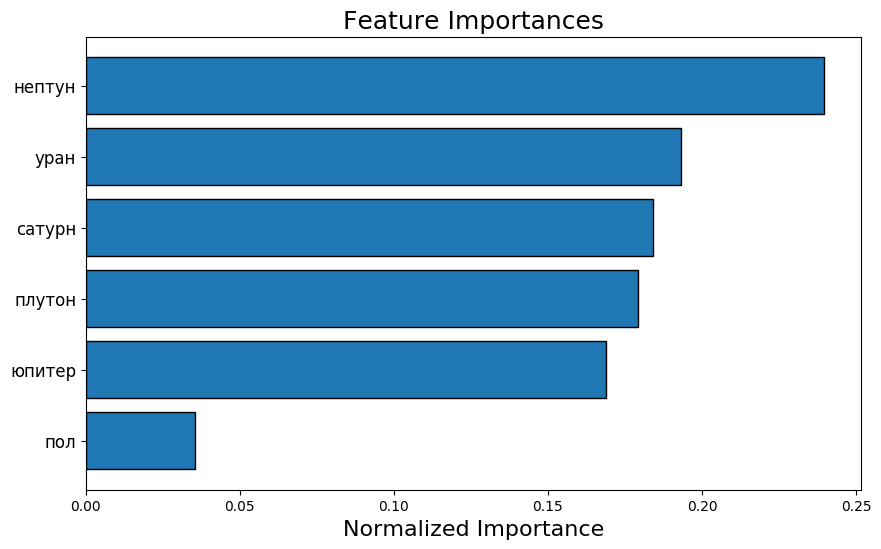

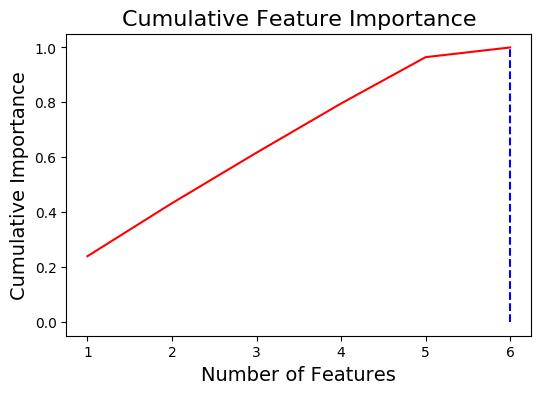

6 features required for 0.99 of cumulative importance


In [ ]:
fs.plot_feature_importances(threshold=0.99,plot_n=6)

In [ ]:
fs.identify_low_importance(cumulative_importance=0.99)

5 features required for cumulative importance of 0.99 after one hot encoding.
1 features do not contribute to cumulative importance of 0.99.



In [ ]:
X_test=test.drop(["годы в днях"], axis="columns")

In [ ]:
Y_test=test["годы в днях"]

## Нормализуем данные с помощью StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


Описываем тренировочный датасет

In [ ]:
pd.DataFrame(X_train).describe()

# Обучаем различные модели по подготовленным данным и проверяем их эффективность

##Создаем Модель линейной регрессии

In [ ]:
clf=LinearRegression()

Обучаем модель линейной регрессии

In [ ]:
clf.fit(X_train,Y_train)

LinearRegression()

Предсказываем с помощью модели линейной регрессии продолжительность жизни.

In [ ]:
predictions_reg=clf.predict(X_test)

Отображаем результаты в виде двух гистограм- для предсказаний и для фактических значений

In [ ]:
pd.DataFrame(predictions_reg).hist(bins=100)
pd.DataFrame(Y_test).hist(bins=100)

Отображаем результаты в виде значения средней абсолютной ошибки

In [ ]:
score=mean_absolute_error(Y_test,predictions_reg)
print(score)

4660.426680742463


## Создаем Последовательную модель нейронной сети

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(6,activation="relu",input_dim=6,kernel_initializer="normal"))

In [ ]:
model.add(Dense(4,activation="relu",kernel_initializer="normal"))

In [ ]:
model.add(Dense(1))

In [ ]:
model.compile(optimizer="sgd",loss="mae",metrics=["mse"])

Обучаем нашу модель

In [ ]:
history=model.fit(X_train, Y_train,epochs=100,validation_split=0.1,verbose=1)

Визуализируем обучение

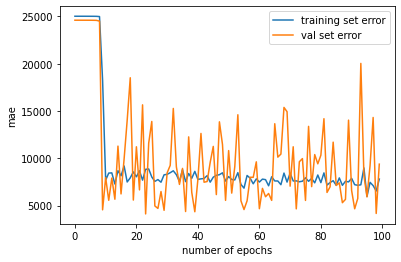

In [ ]:
plt.plot(history.history['loss'],label="training set error")
plt.plot(history.history['val_loss'],label="val set error")
plt.xlabel("number of epochs")
plt.ylabel("mae")
plt.legend()
plt.show()

Предсказываем с помощью нашей модели продолжительность жизни

In [ ]:
predictions=model.predict(X_test)

Визуализируем результаты в виде двух гистограм для наших предсказаний и для фактических значений

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93603d6810>]],
      dtype=object)

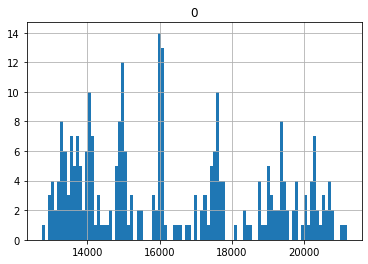

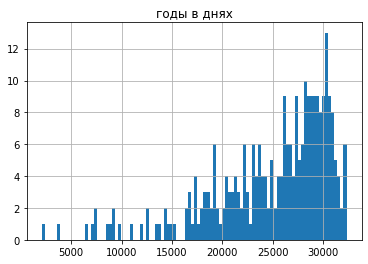

In [ ]:

pd.DataFrame(predictions).hist(bins=100)
pd.DataFrame(Y_test).hist(bins=100)


In [ ]:
score_ANN=mean_absolute_error(Y_test,predictions)
print(score_ANN)

9570.139830449149


# Выводы

В ходе исследования были  ̶п̶р̶и̶м̶е̶н̶е̶н̶ы̶ ̶н̶а̶о̶б̶у̶м̶ проверены две модели машинного обучения: линейная регрессия и полносвязная нейронная сеть прямого распростанения сигнала.

Модель линейной регрессии справилась с первоначальной задачей- предсказание продолжительности жизни лучше, чем полносвязная нейронная сеть.

средняя ошибка модели линейной регрессии  составила 4660 дней, примерно 12,77 лет.

Средняя абсолютная ошибка модели нейронной сети составила 9570 дней, примерно 26,22 года.

Пользоваться примененными методами машинного обучения для предсказания продолжительности жизни по астрологическим показателям не эффективно